
# Project: Formula 1 Data Exploration (EDA) & Preparation
## Author: *Manuel Cartin*
### Objective: To merge multiple Formula 1 datasets and demonstrate the value of data science before the media-driven rise of AI.
This project aims to highlight how data science has long played a crucial role in Formula 1—through telemetry, simulations, and performance analysis—well before artificial intelligence became a buzzword in the sport. By exploring and preparing historical race data, we seek to uncover patterns, validate technical correlations, and reflect on the human, chaotic, and strategic nature of F1.



# 1. Introduction
## Formula 1 Data Exploration (2022–2024)
In this notebook, we perform an exploratory data analysis (EDA) of Formula 1, starting with the 2022 season. We use five datasets covering:
Disclaimer: Data obtained from toUpperCase78. For more details, see their GitHub page.

- Drivers
- Constructors (Teams)
- Circuits (Tracks)
- Races and Results
- Qualifying Sessions and Lap Times
The goal is to merge these datasets into a consolidated base for analysis, and then expand the exploration to include the 2023 and 2024 seasons.

*This analysis also serves as a starting point to reflect on how data science has been applied in Formula 1 for decades, even before the popular rise of AI in 2023.*





# 2. Import Libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


# 3. Load de data 2022

In [ ]:
df_drivers = pd.read_csv('/content/sample_data/Formula1_2022season_drivers.csv')
df_teams = pd.read_csv('/content/sample_data/Formula1_2022season_teams.csv')
df_qualify = pd.read_csv('/content/sample_data/Formula1_2022season_qualifyingResults.csv')
df_races = pd.read_csv('/content/sample_data/Formula1_2022season_raceResults.csv')
df_sprints = pd.read_csv('/content/sample_data/Formula1_2022season_sprintRaceResults.csv')


# 4. Initial Exploration of the 2022 Datasets

In [ ]:
# Ver tamaños y primeras filas
for name, df in zip(['Drivers', 'Teams', 'Tracks', 'Races', 'Results'],
                    [df_drivers, df_teams, df_qualify, df_races, df_sprints]):
    print(f'📘 {name} shape: {df.shape}')
    display(df.head(2))


📘 Drivers shape: (22, 13)


,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,77,2011.5,163,2,1(x35),1,30/09/1997,"Hasselt,Belgium"
1,Charles Leclerc,LEC,16,Ferrari,Monaco,24,868.0,103,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"


📘 Teams shape: (10, 12)


,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB18,Red Bull Powertrains,1997,5,1(x92),81,84
1,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualtieri,F1-75,Ferrari,1950,16,1(x243),242,258


📘 Tracks shape: (440, 9)


,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,16,Charles Leclerc,Ferrari,1:31.471,1:30.932,1:30.558,15
1,Bahrain,2,1,Max Verstappen,Red Bull Racing RBPT,1:31.785,1:30.757,1:30.681,14


📘 Races shape: (440, 11)


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
0,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
1,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,1:35.740


📘 Results shape: (60, 9)


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,Emilia Romagna,1,1,Max Verstappen,Red Bull Racing RBPT,1,21,30:39.567,8
1,Emilia Romagna,2,16,Charles Leclerc,Ferrari,2,21,+2.975,7


# Step 1: Verify Actual Column Names


In [ ]:
print("📘 df_races:", df_races.columns.tolist())
print("📘 df_drivers:", df_drivers.columns.tolist())
print("📘 df_teams:", df_teams.columns.tolist())
print("📘 df_qualify:", df_qualify.columns.tolist())
print("📘 df_sprints:", df_sprints.columns.tolist())


📘 df_races: ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points', '+1 Pt', 'Fastest Lap']
📘 df_drivers: ['Driver', 'Abbreviation', 'No', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered', 'World Championships', 'Highest Race Finish', 'Highest Grid Position', 'Date of Birth', 'Place of Birth']
📘 df_teams: ['Team', 'Full Team Name', 'Base', 'Team Chief', 'Technical Chief', 'Chassis', 'Power Unit', 'First Team Entry', 'World Championships', 'Highest Race Finish', 'Pole Positions', 'Fastest Laps']
📘 df_qualify: ['Track', 'Position', 'No', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
📘 df_sprints: ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points']


# 5. Data Unification (2022 Season)

In [ ]:
# Unión base: df_races con drivers
df_merged = df_races.merge(df_drivers, on=['Driver', 'Team'], how='left') \
                    .merge(df_qualify, on=['Driver', 'Team', 'Track'], how='left', suffixes=('', '_Qualify')) \
                    .merge(df_sprints, on=['Driver', 'Team', 'Track'], how='left', suffixes=('', '_Sprint'))

print('✅ Datos unificados temporada 2022:')
display(df_merged.head())


✅ Datos unificados temporada 2022:


,Track,Position,No_x,Driver,Team,Starting Grid,Laps,Time/Retired,Points_x,+1 Pt,...,Q1,Q2,Q3,Laps_Qualify,Position_Sprint,No_Sprint,Starting Grid_Sprint,Laps_Sprint,Time/Retired_Sprint,Points
0,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,...,1:31.471,1:30.932,1:30.558,15,NaN,NaN,NaN,NaN,NaN,NaN
1,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,...,1:31.567,1:30.787,1:30.687,15,NaN,NaN,NaN,NaN,NaN,NaN
2,Bahrain,3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,...,1:32.285,1:31.048,1:31.238,17,NaN,NaN,NaN,NaN,NaN,NaN
3,Bahrain,4,63,George Russell,Mercedes,9,57,+11.211,12,No,...,1:32.269,1:31.252,1:32.216,17,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,...,1:31.955,1:31.461,1:31.808,12,NaN,NaN,NaN,NaN,NaN,NaN


# 6. Initial Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


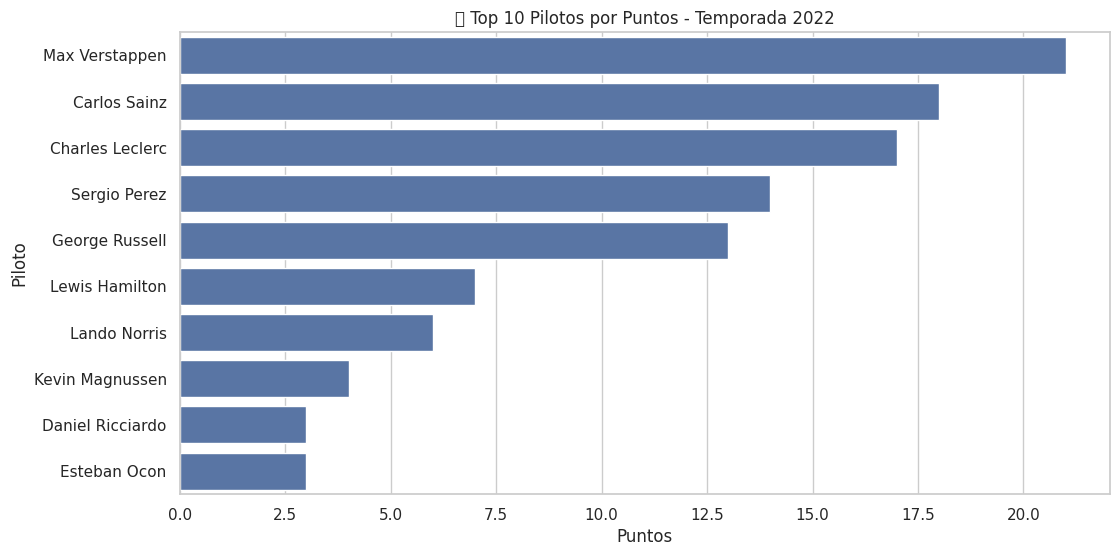

In [ ]:
top_drivers = df_merged.groupby('Driver')['Points'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_drivers.values, y=top_drivers.index)
plt.title('🏁 Top 10 Pilotos por Puntos - Temporada 2022')
plt.xlabel('Puntos')
plt.ylabel('Piloto')
plt.show()


# 7. Load de data 2023

In [ ]:
df_drivers_2023 = pd.read_csv('/content/sample_data/Formula1_2023season_drivers.csv')
df_teams_2023 = pd.read_csv('/content/sample_data/Formula1_2023season_teams.csv')
df_qualify_2023 = pd.read_csv('/content/sample_data/Formula1_2023season_qualifyingResults.csv')
df_races_2023 = pd.read_csv('/content/sample_data/Formula1_2023season_raceResults.csv')
df_sprints_2023 = pd.read_csv('/content/sample_data/Formula1_2023season_sprintResults.csv')
# df_sprints_2023 = pd.read_csv('/content/sample_data/Formula1_2023season_sprintShootoutResults.csv') no se consiguio los resultados de otros años

# 8. Initial Exploration of the 2023 Dataset

In [ ]:
# Ver tamaños y primeras filas
for name, df in zip(['Drivers', 'Teams', 'Tracks', 'Races', 'Results'],
                    [df_drivers_2023, df_teams_2023, df_qualify_2023, df_races_2023, df_sprints_2023]):
    print(f'📘 {name} shape: {df.shape}')
    display(df.head(2))


📘 Drivers shape: (22, 13)


,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1,30/09/1997,"Hasselt, Belgium"
1,Sergio Perez,PER,11,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"


📘 Teams shape: (10, 12)


,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christain Horner,Pierre Waché,RB19,Honda RBPT,1997,6,1(x113),95,95
1,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W14,Mercedes,1970,8,1(x116),129,96


📘 Tracks shape: (440, 9)


,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.295,1:30.503,1:29.708,15
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,1:31.479,1:30.746,1:29.846,15


📘 Races shape: (440, 11)


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344


📘 Results shape: (119, 9)


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,Azerbaijan,1,11,Sergio Perez,Red Bull Racing Honda RBPT,2,17,33:17.667,8
1,Azerbaijan,2,16,Charles Leclerc,Ferrari,1,17,+4.463,7


# Step 1: Verify Actual Column Names

In [ ]:
print("📘 df_races_2023:", df_races_2023.columns.tolist())
print("📘 df_drivers_2023:", df_drivers_2023.columns.tolist())
print("📘 df_teams_2023:", df_teams_2023.columns.tolist())
print("📘 df_qualify_2023:", df_qualify_2023.columns.tolist())
print("📘 df_sprints_2023:", df_sprints_2023.columns.tolist())


📘 df_races_2023: ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time']
📘 df_drivers_2023: ['Driver', 'Abbreviation', 'No', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered', 'World Championships', 'Highest Race Finish', 'Highest Grid Position', 'Date of Birth', 'Place of Birth']
📘 df_teams_2023: ['Team', 'Full Team Name', 'Base', 'Team Chief', 'Technical Chief', 'Chassis', 'Power Unit', 'First Team Entry', 'World Championships', 'Highest Race Finish', 'Pole Positions', 'Fastest Laps']
📘 df_qualify_2023: ['Track', 'Position', 'No', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
📘 df_sprints_2023: ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points']


# 9. Data Unification (2023 Season)

In [ ]:
# Unión base: df_races con drivers
df_merged_2023 = df_races_2023.merge(df_drivers_2023, on=['Driver', 'Team'], how='left') \
                    .merge(df_qualify_2023, on=['Driver', 'Team', 'Track'], how='left', suffixes=('', '_Qualify')) \
                    .merge(df_sprints_2023, on=['Driver', 'Team', 'Track'], how='left', suffixes=('', '_Sprint'))

print('✅ Datos unificados temporada 2023:')
display(df_merged_2023.head())


✅ Datos unificados temporada 2023:


,Track,Position,No_x,Driver,Team,Starting Grid,Laps,Time/Retired,Points_x,Set Fastest Lap,...,Q1,Q2,Q3,Laps_Qualify,Position_Sprint,No_Sprint,Starting Grid_Sprint,Laps_Sprint,Time/Retired_Sprint,Points
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,...,1:31.295,1:30.503,1:29.708,15,NaN,NaN,NaN,NaN,NaN,NaN
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,...,1:31.479,1:30.746,1:29.846,15,NaN,NaN,NaN,NaN,NaN,NaN
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,...,1:31.158,1:30.645,1:30.336,15,NaN,NaN,NaN,NaN,NaN,NaN
3,Bahrain,4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,...,1:30.993,1:30.515,1:30.154,18,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,...,1:31.543,1:30.513,1:30.384,15,NaN,NaN,NaN,NaN,NaN,NaN


# 10. Initial Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


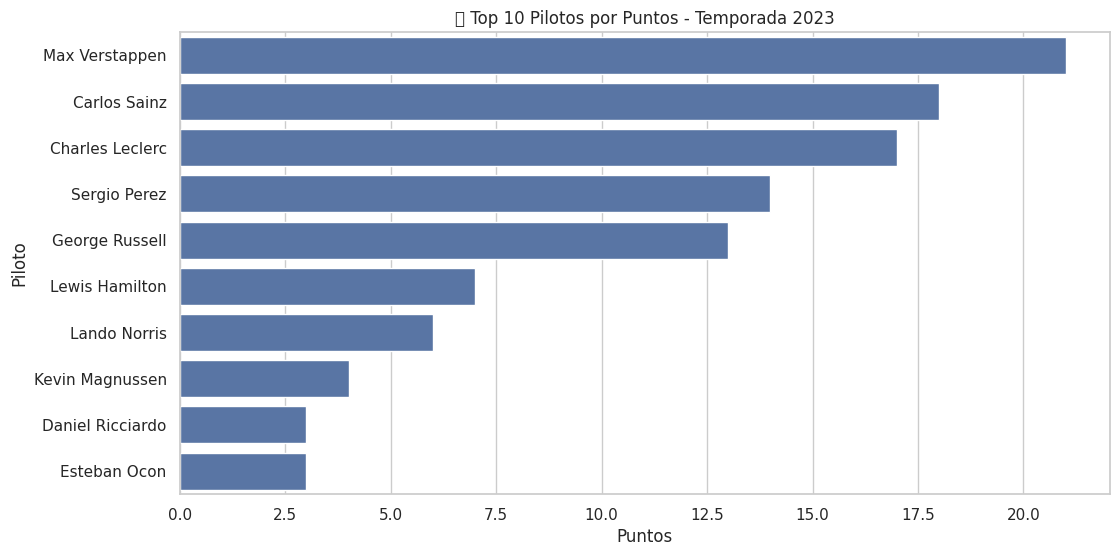

In [ ]:
top_drivers_2023 = df_merged_2023.groupby('Driver')['Points'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_drivers.values, y=top_drivers.index)
plt.title('🏁 Top 10 Pilotos por Puntos - Temporada 2023')
plt.xlabel('Puntos')
plt.ylabel('Piloto')
plt.show()


# 11. Load de data 2024

In [ ]:
df_drivers_2024 = pd.read_csv('/content/sample_data/Formula1_2024season_drivers.csv')
df_teams_2024 = pd.read_csv('/content/sample_data/Formula1_2024season_teams.csv')
df_qualify_2024 = pd.read_csv('/content/sample_data/Formula1_2024season_qualifyingResults.csv')
df_races_2024 = pd.read_csv('/content/sample_data/Formula1_2024season_raceResults.csv')
df_sprints_2024 = pd.read_csv('/content/sample_data/Formula1_2024season_sprintResults.csv')

# 12. Initial Exploration of the 2024 Dataset

In [ ]:
# Ver tamaños y primeras filas
for name, df in zip(['Drivers', 'Teams', 'Tracks', 'Races', 'Results'],
                    [df_drivers_2024, df_teams_2024, df_qualify_2024, df_races_2024, df_sprints_2024]):
    print(f'📘 {name} shape: {df.shape}')
    display(df.head(2))


📘 Drivers shape: (24, 13)


,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,112,3023.5,209,4,1(x63),1,30/09/1997,"Hasselt, Belgium"
1,Lando Norris,NOR,4,McLaren,United Kingdom,26,1007.0,128,0,1(x4),1,13/11/1999,"Bristol, England"


📘 Teams shape: (10, 12)


,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL38,Mercedes,1966,9,1(x189),164,172
1,Ferrari,Scuderia Ferrari HP,"Maranello, Italy",Frédéric Vasseur,Loic Serra / Enrico Gualtieri,SF-24,Ferrari,1950,16,1(x249),253,263


📘 Tracks shape: (478, 9)


,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:30.031,1:29.374,1:29.179,17
1,Bahrain,2,16,Charles Leclerc,Ferrari,1:30.243,1:29.165,1:29.407,19


📘 Races shape: (479, 11)


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364


📘 Results shape: (120, 9)


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,China,1,1,Max Verstappen,Red Bull Racing Honda RBPT,4,19,32:04.660,8
1,China,2,44,Lewis Hamilton,Mercedes,2,19,+13.043,7


# Step 1: Verify Actual Column Names

In [ ]:
print("📘 df_races_2024:", df_races_2024.columns.tolist())
print("📘 df_drivers_2024:", df_drivers_2024.columns.tolist())
print("📘 df_teams_2024:", df_teams_2024.columns.tolist())
print("📘 df_qualify_2024:", df_qualify_2024.columns.tolist())
print("📘 df_sprints_2024:", df_sprints_2024.columns.tolist())


📘 df_races_2024: ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time']
📘 df_drivers_2024: ['Driver', 'Abbreviation', 'No', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered', 'World Championships', 'Highest Race Finish', 'Highest Grid Position', 'Date of Birth', 'Place of Birth']
📘 df_teams_2024: ['Team', 'Full Team Name', 'Base', 'Team Chief', 'Technical Chief', 'Chassis', 'Power Unit', 'First Team Entry', 'World Championships', 'Highest Race Finish', 'Pole Positions', 'Fastest Laps']
📘 df_qualify_2024: ['Track', 'Position', 'No', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
📘 df_sprints_2024: ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points']


# 13. Data Unification (2024 Season)

In [ ]:
# Unión base: df_races con drivers
df_merged_2024 = df_races_2024.merge(df_drivers_2024, on=['Driver', 'Team'], how='left') \
                    .merge(df_qualify_2024, on=['Driver', 'Team', 'Track'], how='left', suffixes=('', '_Qualify')) \
                    .merge(df_sprints_2024, on=['Driver', 'Team', 'Track'], how='left', suffixes=('', '_Sprint'))

print('✅ Datos unificados temporada 2023:')
display(df_merged_2024.head())


✅ Datos unificados temporada 2023:


,Track,Position,No_x,Driver,Team,Starting Grid,Laps,Time/Retired,Points_x,Set Fastest Lap,...,Q1,Q2,Q3,Laps_Qualify,Position_Sprint,No_Sprint,Starting Grid_Sprint,Laps_Sprint,Time/Retired_Sprint,Points
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,...,1:30.031,1:29.374,1:29.179,17.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,...,1:30.221,1:29.932,1:29.537,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Bahrain,3,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,...,1:29.909,1:29.573,1:29.507,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Bahrain,4,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,...,1:30.243,1:29.165,1:29.407,19.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,5,63,George Russell,Mercedes,3,57,+46.788,10,No,...,1:30.350,1:29.922,1:29.485,17.0,NaN,NaN,NaN,NaN,NaN,NaN


# 14. Initial Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


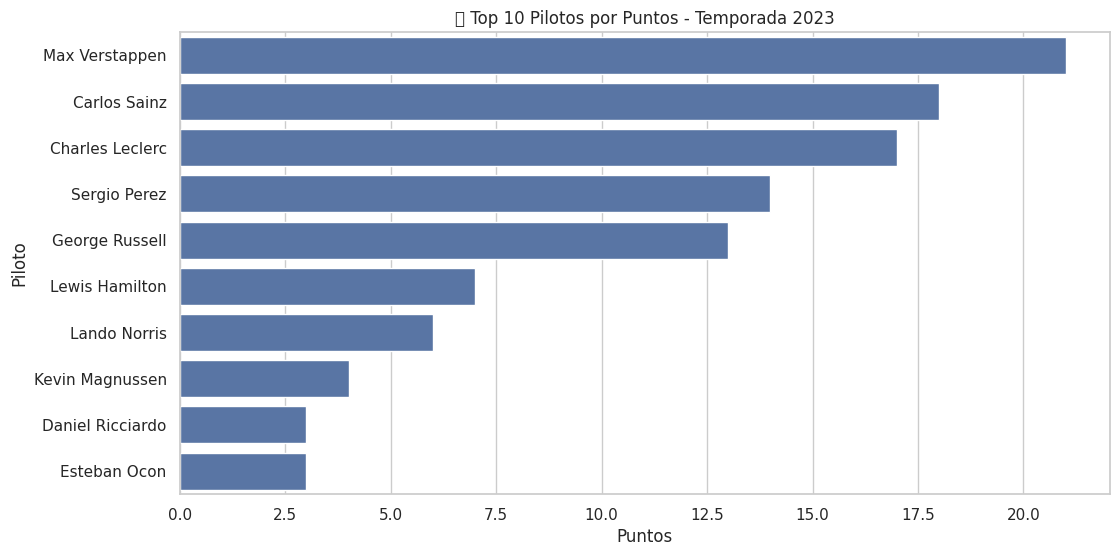

In [ ]:
top_drivers_2024 = df_merged_2024.groupby('Driver')['Points'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_drivers.values, y=top_drivers.index)
plt.title('🏁 Top 10 Pilotos por Puntos - Temporada 2023')
plt.xlabel('Puntos')
plt.ylabel('Piloto')
plt.show()


# 15. Expansion: Merging Seasons 2022–2024

In [ ]:
# Asegúrate de que cada df tenga la columna 'Season'
df_merged['Season'] = 2022
df_merged_2023['Season'] = 2023
df_merged_2024['Season'] = 2024

# Lista de datasets ya unificados
dfs_all_years = [df_merged, df_merged_2023, df_merged_2024]

# Unión total
df_all = pd.concat(dfs_all_years, ignore_index=True)
print(f'Tamaño del dataset combinado: {df_all.shape}')



Tamaño del dataset combinado: (1359, 37)


# 16. Display Final Result

In [ ]:
display(df_all.head())

,Track,Position,No_x,Driver,Team,Starting Grid,Laps,Time/Retired,Points_x,+1 Pt,...,Laps_Qualify,Position_Sprint,No_Sprint,Starting Grid_Sprint,Laps_Sprint,Time/Retired_Sprint,Points,Season,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
1,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
2,Bahrain,3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
3,Bahrain,4,63,George Russell,Mercedes,9,57,+11.211,12,No,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
4,Bahrain,5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN


# 17. Conclusions
## Data vs AI: Formula 1 and the Science of Speed
Long before the rise of generative AI in 2023, Formula 1 was already a pioneer in data science, applying it across multiple domains:
- 🧭 Lap-by-lap performance analysis
- 🧠 Race strategy simulations
- 🌦️ Weather data visualization
- 🛠️ Pit stop prediction models
- 🧪 Tire wear evaluation
- ⚙️ Car setup optimization
*This project demonstrates how, using basic EDA techniques with Python and pandas, we can replicate part of the analytical process once reserved for elite trackside engineers.*
### For deeper exploration, tools like FastF1 and projects like Formula1-Analytics show how telemetry, lap timing, and strategy modeling are now accessible to any data scientist.




# 18. Save Final Database

In [ ]:
# Guardar dataset limpio para futuros modelos o dashboards
df_all.to_csv("f1_2022_2024_clean.csv", index=False)
